> This is one of the 100 recipes of the [IPython Cookbook](http://ipython-books.github.io/), the definitive guide to high-performance scientific computing and data science in Python.


# Estimating a probability distribution nonparametrically with a Kernel Density Estimation

You need to download the *Storms* dataset on the book's website, and extract it in the current directory. (http://ipython-books.github.io)

You also need matplotlib's toolkit *basemap*. (http://matplotlib.org/basemap/)

$conda install basemap

1) Let's import the usual packages. The kernel density estimation with a Gaussian kernel is implemented in *SciPy.stats*.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

2) Let's open the data with Pandas.

In [1]:
# http://www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data
df = pd.read_csv("Allstorms.ibtracs_wmo.v03r05.csv")

NameError: name 'pd' is not defined

3) The dataset contains information about most storms since 1848. A single storm may appear multiple times across several consecutive days.

In [3]:
df[df.columns[[0,1,3,8,9]]].head()

,Serial_Num,Season,Basin,Latitude,Longitude
0,1848011S09080,1848,SI,-8.6,79.8
1,1848011S09080,1848,SI,-9.0,78.9
2,1848011S09080,1848,SI,-10.4,73.2
3,1848011S09080,1848,SI,-12.8,69.9
4,1848011S09080,1848,SI,-13.9,68.9


In [4]:
df64 = df[df['Season'] == 1964]
names,inds = np.unique(df64['Name'],return_index=True)
print names
#dfcleo = df64[df64['Name'] == 'CLEO']
#plt.plot(dfcleo['Wind(WMO)'])

dfisbell = df64[df64['Name'] == 'ISBELL']
dfcora = df64[df64['Name'] == 'CORA']

#plt.plot(dfisbell['Wind(WMO)'])
#dfisbell

#plt.plot(dfisbell['Longitude'],dfisbell['Latitude'])
#dfisbell['Longitude']
#plt.plot(dfisbell['Longitude'],dfisbell['Wind(WMO)'])

['02S:AMANDA' '04S:BETTY' '05S:BESSIE' '07P:AUDREY' '08S:CHRISTINE'
 '09S:DANIELLE' '12P:BERTHA:BERTHE' '13S:DORA' '14S:EILEEN' '17S:FRANCES'
 '18S:GISELLE' '20S:EVA' '22S:HARRIET' '23S:HAZEL' '25P:CARMEN'
 '27P:GERTIE' '29P:HENRIETTA' '35S:KAREN' 'ABBY' 'ALICE' 'AMANDA' 'ANITA'
 'BETTY' 'BILLIE' 'BRENDA' 'CLARA' 'CLEO' 'CORA' 'DORA' 'DORIS' 'DOT'
 'ELSIE' 'ETHEL' 'FLORENCE' 'FLOSSIE' 'FRAN' 'GEORGIA' 'GLADYS' 'GRACE'
 'HELEN' 'HILDA' 'HOPE' 'IDA' 'IRIS' 'ISBELL' 'JOAN' 'JOSE' 'JUNE' 'KATE'
 'KATHY' 'KATIE' 'LORNA' 'LOUISE:MARGE' 'MARIE' 'NATALIE' 'NORA' 'ODESSA'
 'OPAL' 'PRUDENCE' 'ROSALYN:ROSLYN' 'RUBY' 'SALLY' 'TESS' 'TILDA' 'TILLIE'
 'UNNAMED' 'VIOLA' 'WILDA' 'WINNIE']


4) We use Pandas' `groupby` function to obtain the average location of every storm.

In [5]:
dfs = df.groupby('Serial_Num')
pos = dfs[['Latitude', 'Longitude']].mean()
y, x = pos.values.T
pos.head()

ipos = dfisbell[['Latitude', 'Longitude']]
yi, xi = ipos.values.T
ipos.head()

cpos = dfcora[['Latitude', 'Longitude']]
yc, xc = cpos.values.T
#cpos.head()

5) We display the storms on a map with basemap. This toolkit allows us to easily project the geographical coordinates on the map.

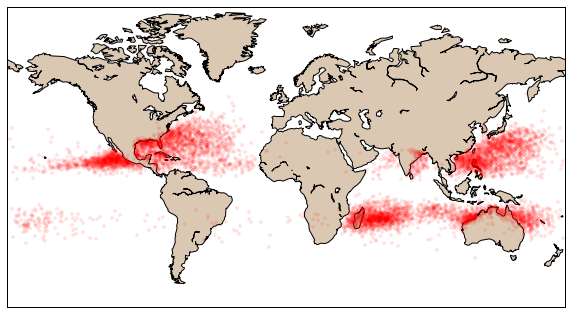

In [6]:
m = Basemap(projection='mill', llcrnrlat=-65 ,urcrnrlat=85,
            llcrnrlon=-180, urcrnrlon=180)
x0, y0 = m(-180, -65)
x1, y1 = m(180, 85)
plt.figure(figsize=(10,6))
m.drawcoastlines()
m.fillcontinents(color='#dbc8b2')
xm, ym = m(x, y)
m.plot(xm, ym, '.r', alpha=.1);

6) To perform the Kernel Density Estimation, we need to stack the x and y coordinates of the storms into a 2xN array.

In [7]:
h = np.vstack((xm, ym))

In [8]:
kde = st.gaussian_kde(h)

7) The `gaussian_kde` routine returned a Python function. To see the results on a map, we need to evaluate this function on a 2D grid spanning the entire map. We create this grid with `meshgrid`, and we pass the x, y values to the `kde` function. We need to arrange the shape of the array since `kde` accepts a 2xN array as input.

In [9]:
k = 50
tx, ty = np.meshgrid(np.linspace(x0, x1, 2*k),
                     np.linspace(y0, y1, k))
v = kde(np.vstack((tx.ravel(), ty.ravel()))).reshape((k, 2*k))

8) Finally, we display the estimated density with `imshow`.

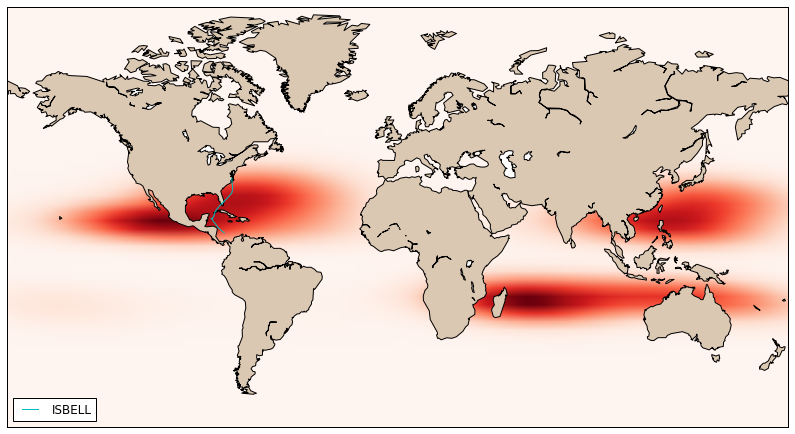

In [10]:
plt.figure(figsize=(14,10),dpi=300)
m.drawcoastlines()
m.fillcontinents(color='#dbc8b2')
xm, ym = m(x, y)
m.imshow(v, origin='lower', extent=[x0,x1,y0,y1],
         cmap=plt.get_cmap('Reds'));
xmi,ymi = m(xi,yi)
plt.plot(xmi,ymi,'c-',label='ISBELL')
#xmc,ymc = m(xc,yc)
#plt.plot(xmc,ymc,'c-',label='CORA')
plt.legend(loc='lower left')
plt.savefig('ISBELL.png',dpi=300)

> You'll find all the explanations, figures, references, and much more in the book (to be released later this summer).

> [IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (500 pages).